In [1]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:90% !important; }</style>"))
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('default') # haciendo los graficos un poco mas bonitos xD
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
propiedades = pd.read_csv('propiedades-clean.csv')

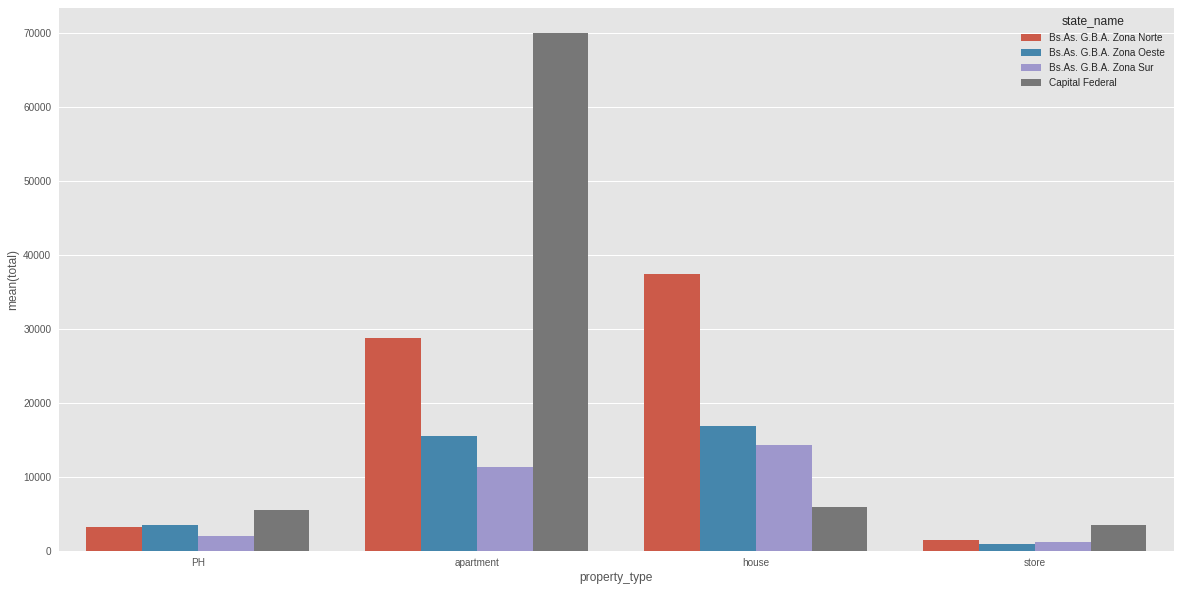

In [4]:
import seaborn as sns
x = propiedades.groupby(['state_name','property_type']).size().to_frame('total').reset_index()
sns.barplot(x='property_type', y='total', hue='state_name', data=x)


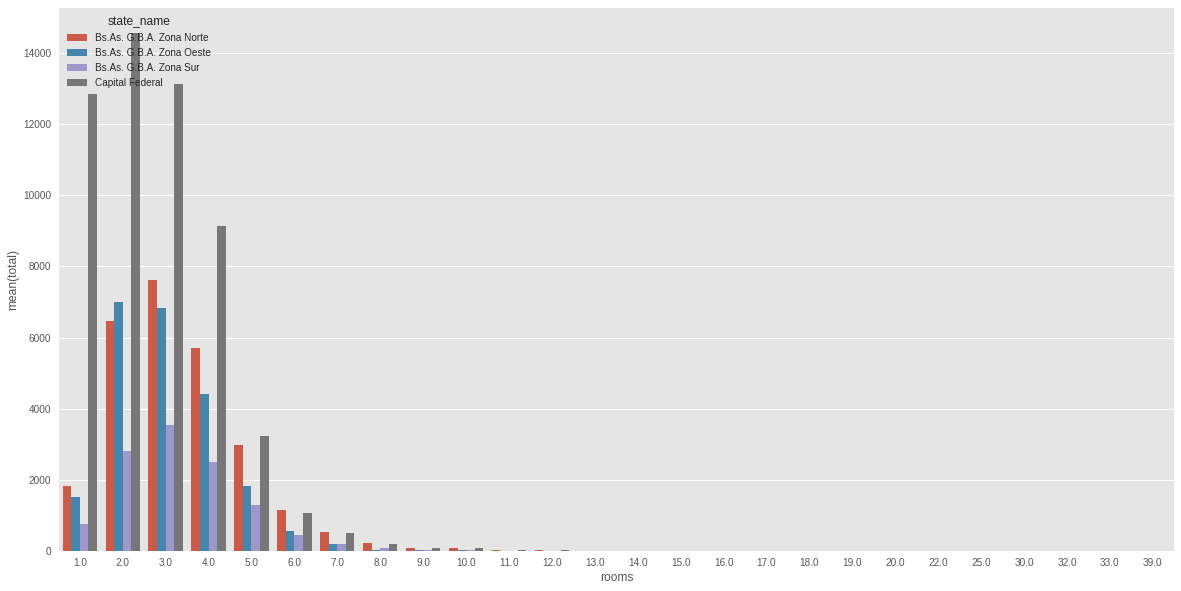

In [5]:
x = propiedades.groupby(['state_name','rooms']).size().to_frame('total').reset_index()
sns.barplot(x='rooms', y='total', hue='state_name', data=x)

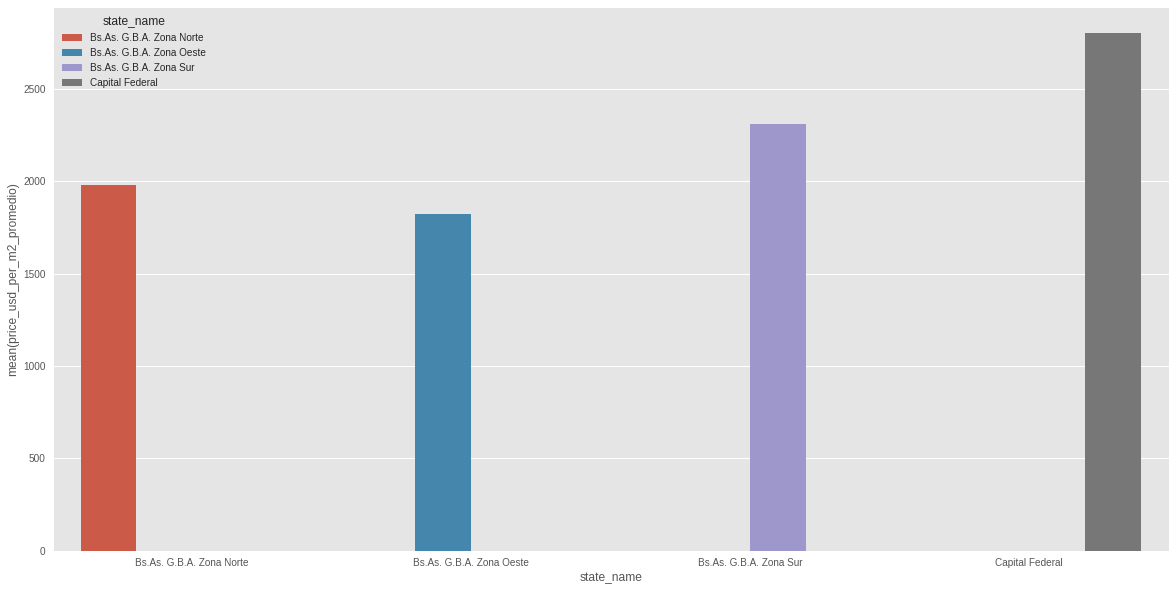

In [7]:
x = propiedades[['state_name','price_usd_per_m2']].groupby(['state_name']).mean()
x = x['price_usd_per_m2'].to_frame('price_usd_per_m2_promedio').reset_index()
plot = sns.barplot(x='state_name', y='price_usd_per_m2_promedio', hue='state_name', data=x)

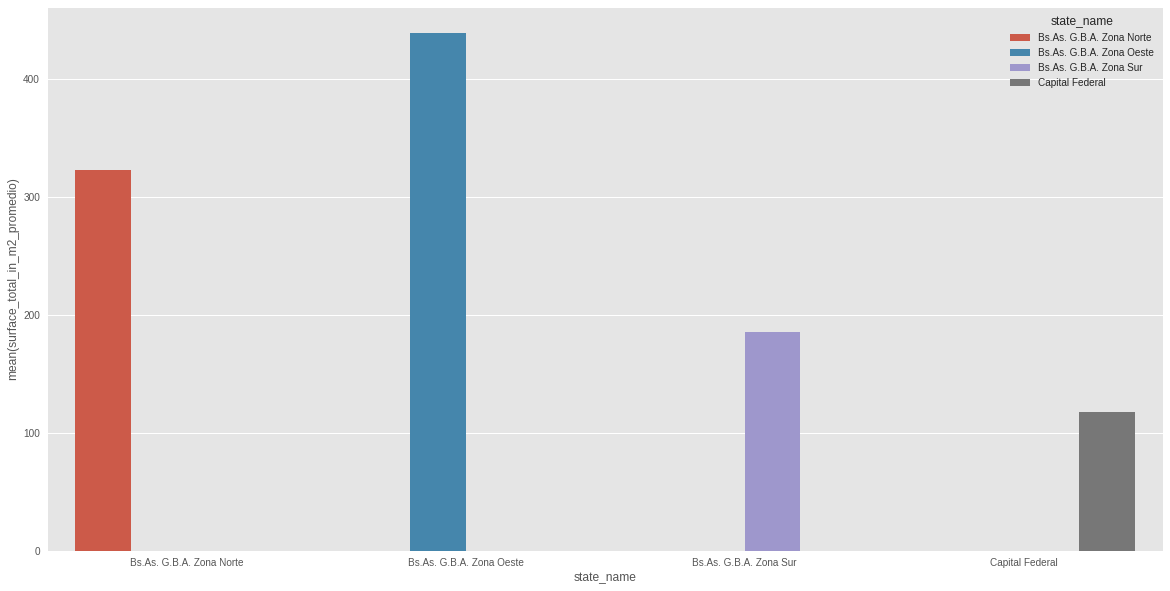

In [8]:
variable = 'surface_total_in_m2'
enGrafico = 'surface_total_in_m2_promedio'
x = propiedades[['state_name',variable]].groupby(['state_name']).mean()
x = x[variable].to_frame(enGrafico).reset_index()
sns.barplot(x='state_name', y=enGrafico, hue='state_name', data=x)

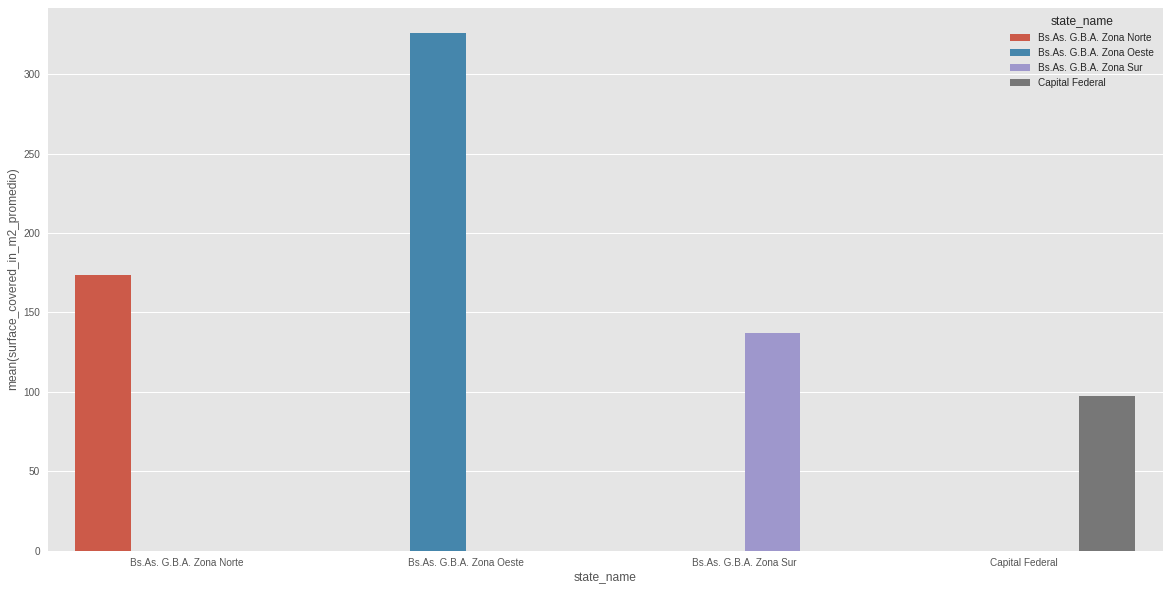

In [9]:
variable = 'surface_covered_in_m2'
enGrafico = 'surface_covered_in_m2_promedio'
x = propiedades[['state_name',variable]].groupby(['state_name']).mean()
x = x[variable].to_frame(enGrafico).reset_index()
sns.barplot(x='state_name', y=enGrafico, hue='state_name', data=x)

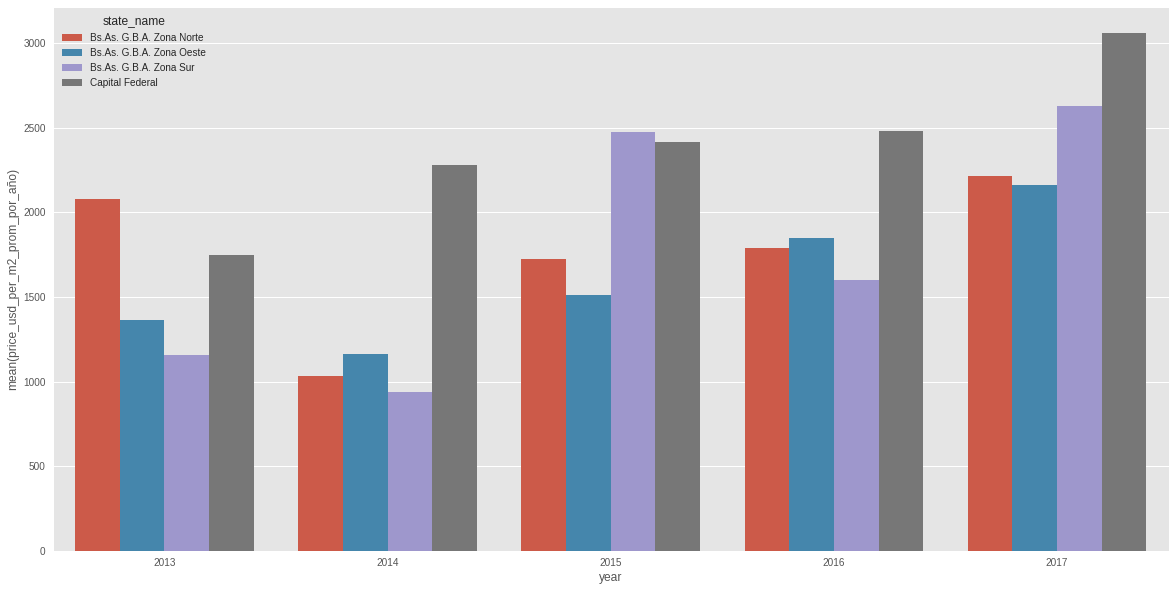

In [10]:
variable = 'price_usd_per_m2'
enGrafico = 'price_usd_per_m2_prom_por_año'
x = propiedades[['state_name','year',variable]].groupby(['state_name','year']).mean()
x = x[variable].to_frame(enGrafico).reset_index()
sns.barplot(x='year', y=enGrafico, hue='state_name', data=x)